# Basic Models - Linear Regression

A linear regression learning algorithm example using Tensorflow library.

> Requirements:
> 1. Numpy - A fundamental package for scientific computation
> 2. Matplotlib - A visualization library 
> 3. Sklean - For Boston dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import genfromtxt
from sklearn.datasets import load_boston

In [2]:
# Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 10

In [3]:
boston = load_boston()
bfeatures = np.array(boston.data)
blabels = np.array(boston.target)

In [4]:
data = genfromtxt('data.csv', delimiter=',')
feature = data[1:, 0]
label = data[1:, 1]
print("Shape of feature data: ", feature.shape, "\nShape of label data: ", label.shape)

Shape of feature data:  (100,) 
Shape of label data:  (100,)


Let's divide training and testing sets.

In [5]:
feature = np.round(feature, decimals = 2)
label = np.round(label, decimals = 2)

In [6]:
train_X = np.asarray(feature[:70])
train_Y = np.asarray(label[:70])

In [7]:
n_samples = train_X.shape[0]

## Let's define graph input for tensorflow
Our both the data has float value. So, we will define float placeholder for both the values. 

In [8]:
# Tensorflow graph input
X = tf.placeholder(tf.float32, name='x')
Y = tf.placeholder(tf.float32, name='y')

As this is linear model, our model equation becomes <br><br>
<center>$ Y = W * X + b$</center><br>
Here, W is weight of our model and b is bias of our model. As we have discussed, we are gonna define our weights and bias with some *_random value_*. 

In [9]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

In [10]:
# Construct our model

pred = tf.add(tf.multiply(X , W), b)

In [11]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [12]:
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [13]:
# Initialize the variables (Assign their default value)
init = tf.global_variables_initializer()

Epoch: 0010 cost= 59.315738678 W= 1.4627861 b= 0.77644706
Epoch: 0020 cost= 59.315547943 W= 1.4627619 b= 0.7776652
Epoch: 0030 cost= 59.315345764 W= 1.4627373 b= 0.7788843
Epoch: 0040 cost= 59.315135956 W= 1.4627128 b= 0.78010327
Epoch: 0050 cost= 59.314922333 W= 1.4626882 b= 0.7813221
Epoch: 0060 cost= 59.314723969 W= 1.462664 b= 0.7825413
Epoch: 0070 cost= 59.314517975 W= 1.4626393 b= 0.78376025
Epoch: 0080 cost= 59.314315796 W= 1.4626149 b= 0.78497887
Epoch: 0090 cost= 59.314109802 W= 1.4625906 b= 0.7861969
Epoch: 0100 cost= 59.313907623 W= 1.4625661 b= 0.78741443
Epoch: 0110 cost= 59.313701630 W= 1.4625416 b= 0.78863215
Epoch: 0120 cost= 59.313499451 W= 1.4625173 b= 0.7898493
Epoch: 0130 cost= 59.313282013 W= 1.4624926 b= 0.7910665
Epoch: 0140 cost= 59.313087463 W= 1.4624684 b= 0.79228216
Epoch: 0150 cost= 59.312877655 W= 1.462444 b= 0.793497
Epoch: 0160 cost= 59.312667847 W= 1.4624194 b= 0.7947117
Epoch: 0170 cost= 59.312473297 W= 1.4623951 b= 0.7959246
Epoch: 0180 cost= 59.312263

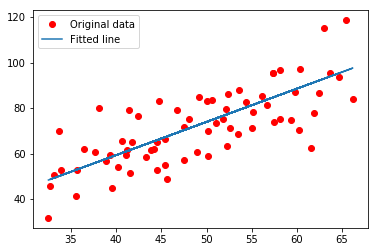

Testing... (Mean square loss Comparison)
Testing cost= 48.577175
Absolute mean square loss difference: 10.718842


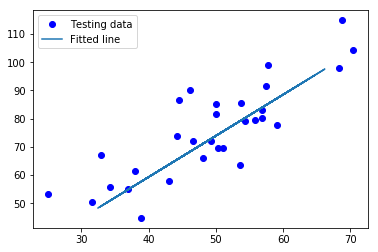

In [14]:
# Start session

with tf.Session() as sess:
    
    # Run the initializer
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X:x, Y:y})
        
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    print("Training completed!")
    
    
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

     # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    # Testing example, as requested (Issue #2)
    test_X = np.asarray(feature[-30:])
    test_Y = np.asarray(label[-30:])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()